<a href="https://colab.research.google.com/github/asepmuhidin/research/blob/master/Copy_of_cla_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive

In [36]:
drive.mount('/mnt')

Drive already mounted at /mnt; to attempt to forcibly remount, call drive.mount("/mnt", force_remount=True).


In [37]:
!ls /mnt/MyDrive/AI/dataset

Titanic-Dataset.csv


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [39]:
root="/mnt/MyDrive/AI"
path_dataset=root+"/dataset/"
dataset_file="Titanic-Dataset.csv"

In [40]:
df=pd.read_csv(path_dataset+dataset_file)

In [41]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [42]:
df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [43]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [45]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [46]:
#Hapus kolom kabin karena terlalu banyak yg kosong(>50%)
df.drop(columns=['Cabin'],inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [48]:
mean_age=df.Age.mean()
mean_age

29.69911764705882

In [49]:
df.Age.fillna(mean_age,inplace=True)

In [50]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [51]:
df.Embarked.fillna('S',inplace=True)

In [52]:
df.duplicated().sum()

111

In [53]:
#Cek duplikasi data
df.drop_duplicates()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Q
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [54]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [55]:
col_cate=['Pclass','Sex','Embarked']

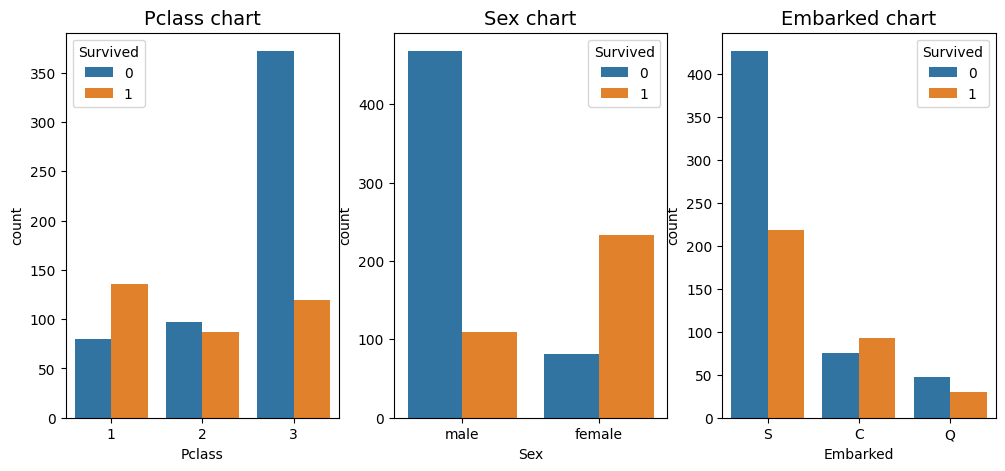

In [56]:
fig,axes=plt.subplots(1,3, figsize=(12,5))
axes=axes.flatten()
for cate,axs in zip(col_cate,axes):
  axs.set_title(cate + ' chart',fontsize=14)
  sn.countplot(x=cate,data=df, ax=axs,hue='Survived')

In [57]:
type(axes)

numpy.ndarray

In [58]:
col_numerics=['Fare']
df[col_numerics].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


<Axes: xlabel='Fare', ylabel='Count'>

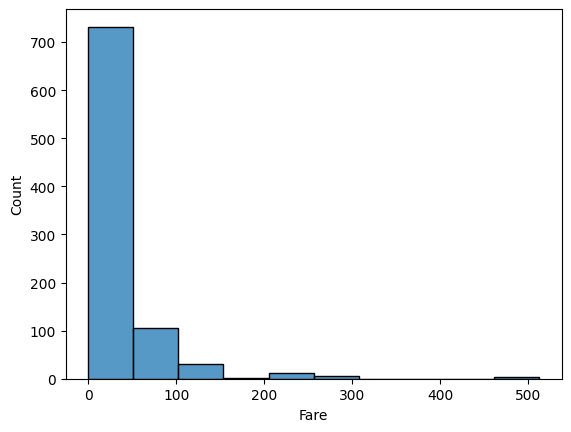

In [62]:
sn.histplot(data=df,x='Fare', bins=10)

In [63]:
X=df.drop(columns=['Survived'])
y=df.Survived

In [67]:
X=pd.get_dummies(X, columns=['Pclass','Sex','Embarked'])

In [83]:
from sklearn.model_selection import train_test_split,  cross_val_score

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42, stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((668, 12), (223, 12), (668,), (223,))

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [70]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [71]:
knn.score(X,y)

0.9775533108866442

In [82]:
knn_split=KNeighborsClassifier(n_neighbors=3)

In [80]:
knn_split.fit(X_train,y_train)

KNeighborsClassifier()

In [81]:
knn_split.score(X_test,y_test)

0.6816143497757847

In [87]:
scores=cross_val_score(knn_split,X,y,cv=5)
scores

array([0.68156425, 0.71348315, 0.73595506, 0.74157303, 0.68539326])

In [88]:
df.Fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [90]:
df.Fare.max()

512.3292

In [91]:
def x_sc(x):
  return (x-df.Fare.min())/(df.Fare.max()-df.Fare.min())

In [102]:
x_sc(7.25)

0.014151057562208049

In [94]:
#Improve ( Melalui Data/Feature Engineering)-->Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [96]:
X_train_sc=scaler.transform(X_train)
X_test_sc=scaler.transform(X_test)

In [101]:
X_train_sc

array([[0.43453129, 0.125     , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.23347575, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.42196532, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.59788892, 0.125     , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.58532295, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.33400352, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [99]:
knn_split.fit(X_train_sc,y_train)

KNeighborsClassifier(n_neighbors=3)

In [100]:
knn_split.score(X_test_sc,y_test)

0.8161434977578476